# IE 582 - HOMEWORK 3

## Gizem Güneş

### Since 27-03-2016 data is missing, data includes the dates between  28-03-2016 and 10-11-2019 is used. Also, test data includes the dates after 01-11-2019 and 10-11-2019.  

In [109]:
install.packages("caret")
library(glmnet)
library(lubridate)
library(tidyr)
library(dplyr)
library(caret)
library(data.table)

package 'caret' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\gizem\AppData\Local\Temp\Rtmp6BDFYN\downloaded_packages


ERROR: Error: package or namespace load failed for 'caret' in loadNamespace(i, c(lib.loc, .libPaths()), versionCheck = vI[[i]]):
 namespace 'rlang' 0.3.4 is already loaded, but >= 0.4.0 is required


In [110]:
#Data is read and column names are changed as following :
data = read.csv('C:/Users/gizem/Desktop/MS-3/IE582 - Data Mining/Homeworks - gizemgunes/HW3/Data.csv', header = T, sep=",")
colnames(data) = c("Date", "Hour", "Consumption")
str(data) #All features are shown as Factor, so their types need to be changed.


'data.frame':	31752 obs. of  3 variables:
 $ Date       : Factor w/ 1323 levels "01.01.2017","01.01.2018",..: 1178 1178 1178 1178 1178 1178 1178 1178 1178 1178 ...
 $ Hour       : Factor w/ 24 levels "00:00","01:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Consumption: Factor w/ 31432 levels "17.796,48","17.940,44",..: 4910 1950 985 673 622 765 989 2895 12763 19840 ...


In [111]:
#Type of Date Feature is changed as following :
data$Date = as.Date(data$Date, format="%d.%m.%Y")

#When types of features are changed by as.numeric function, it is observed that values are changed, so data is broken.
#Therefore, long way is chosen for changing their types as following :
data = separate (data, Hour, into = c("Hour", "Minute"), sep = ":", remove = TRUE)
data = data[,-3]
data$Hour = as.numeric(data$Hour)
data$fullDate = data$Date + hours(data$Hour)

data = separate(data, Consumption, into=c("First","Second"), sep = "," , remove=FALSE)
data$First = as.numeric(data$First)
data$Second = as.numeric(data$Second)
data$First = as.numeric(data$First) * 1000
data$Second = data$Second / 100
data$Consumption = data$First + data$Second
data = data %>% select(fullDate, everything())
data = data[,c(1:4)]

str(data) #Types of features seem as needed.


'data.frame':	31752 obs. of  4 variables:
 $ fullDate   : POSIXlt, format: "2016-03-28 00:00:00" "2016-03-28 01:00:00" ...
 $ Date       : Date, format: "2016-03-28" "2016-03-28" ...
 $ Hour       : num  0 1 2 3 4 5 6 7 8 9 ...
 $ Consumption: num  27358 25457 24328 23679 23560 ...


# Task A

In [112]:
#Lag48 and Lag168 features are created as following :
A_Data = data
A_Data$Naive_Lag48 = NA
A_Data$Naive_Lag168 = NA
for (i in 49:nrow(A_Data)) {
  A_Data[i,5] = A_Data[(i-48),4]
  i = i+1 }
for (i in 169:nrow(A_Data)) {
  A_Data[i,6] = A_Data[(i-168),4]
  i = i+1 }

In [113]:
#Test data is created as following :
A_Data = A_Data[A_Data$Date >="2019-11-01",]

In [114]:
#MAPE values are calculated as following :
A_Data$Per_Abs_Error_Lag48 = round((abs(A_Data$Consumption - A_Data$Naive_Lag48) / A_Data$Consumption * 100), 2)
A_Data$Per_Abs_Error_Lag168 = round((abs(A_Data$Consumption - A_Data$Naive_Lag168) / A_Data$Consumption * 100), 2)


In [115]:
#Summary table is created as following :
Model = c("Lag48", "Lag168")
MAPE = c(paste(round(mean(A_Data$Per_Abs_Error_Lag48),2),"%"),paste(round(mean(A_Data$Per_Abs_Error_Lag168),2),"%")) 
Std.Deviation = c(paste(round(sd(A_Data$Per_Abs_Error_Lag48),2),"%"),paste(round(sd(A_Data$Per_Abs_Error_Lag168),2),"%"))

A_MAPE = data.frame(Model, MAPE, Std.Deviation)
A_MAPE

Model,MAPE,Std.Deviation
Lag48,7.81 %,9.04 %
Lag168,4.04 %,4.66 %


#### Therefore, it is observed that performance of Lag_168 is better.

# TASK B

In [116]:
#Data preparation :
B_Data = data
B_Data$Lag48 = NA
B_Data$Lag168 = NA
for (i in 49:nrow(B_Data)) {
  B_Data[i,5] = B_Data[(i-48),4]
  i = i+1 }
for (i in 169:nrow(B_Data)) {
  B_Data[i,6] = B_Data[(i-168),4]
  i = i+1 }

table(is.na.data.frame(B_Data))


 FALSE   TRUE 
190296    216 

In [117]:
#Since there are NA values, so we remove first 7 days as following :
B_Data = B_Data[B_Data$Date >= (min(B_Data$Date) + days(7)),]

In [118]:
#Ordering columns of the data :
B_Data = B_Data %>% select(fullDate, Date, Hour, Lag48, Lag168, Consumption)
head(B_Data)

,fullDate,Date,Hour,Lag48,Lag168,Consumption
169,2016-04-04 00:00:00,2016-04-04,0,28487.31,27358.43,26079.65
170,2016-04-04 01:00:00,2016-04-04,1,27017.06,25456.57,24600.38
171,2016-04-04 02:00:00,2016-04-04,2,25924.33,24328.06,23402.93
172,2016-04-04 03:00:00,2016-04-04,3,25080.56,23678.54,22927.60
173,2016-04-04 04:00:00,2016-04-04,4,24928.11,23560.31,22869.51
174,2016-04-04 05:00:00,2016-04-04,5,25285.42,23899.49,23315.44


In [119]:
#Data is divided into two parts as training and test data :
B_training = B_Data[B_Data$Date < "2019-11-01",]
B_test = B_Data[B_Data$Date >= "2019-11-01",]


,Lag48,Lag168,Consumption
Lag48,1.0000000,0.6464991,0.7300922
Lag168,0.6464991,1.0000000,0.8321096
Consumption,0.7300922,0.8321096,1.0000000


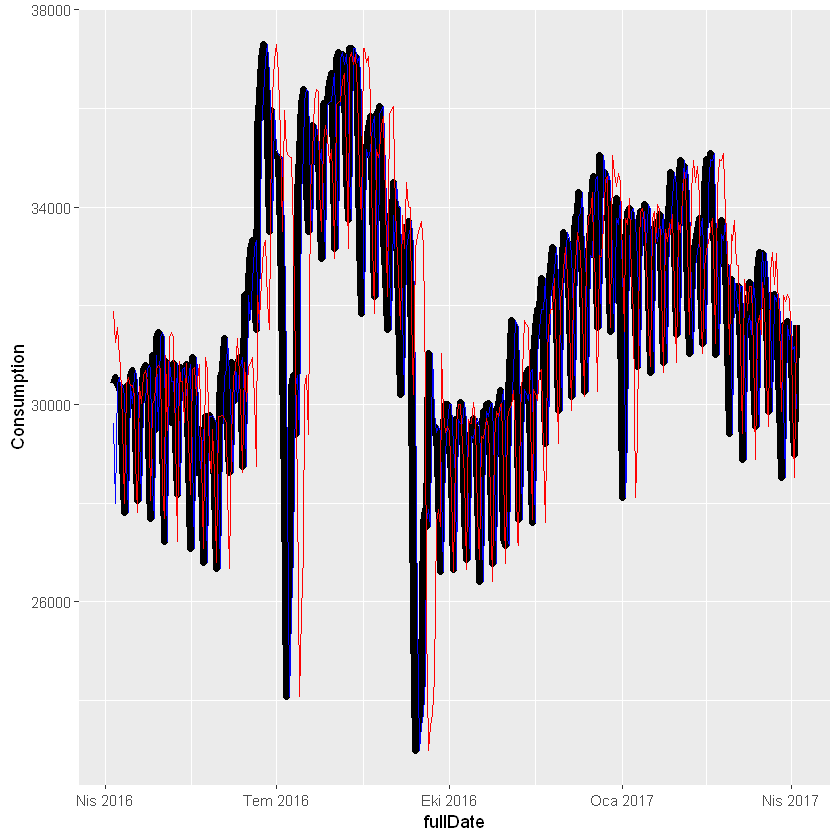

In [120]:
#Understanding the training data
B_training$fullDate = as.POSIXct(B_training$fullDate)
ggplot() + 
  geom_line(data=B_training[1:365*24,], aes(fullDate, Consumption), color='black', size=2)+
  geom_line(data=B_training[1:365*24,], aes(fullDate, Lag48), color='blue') +
  geom_line(data=B_training[1:365*24,], aes(fullDate, Lag168), color='red') 
cor(B_training[,c(4:6)])

#### Lag168 has more explanation of Consumption in terms of correlation values.

In [121]:
#Linear model is constructed as following:
linregmod = lm(Consumption ~ Lag48 + Lag168 , data=B_training) 

#Prediction values are calculated as following :
B_test$Prediction = predict(linregmod, B_test, type="response")

In [122]:
#MAPE values are calculated as following :
B_test$Per_Abs_Error = round((abs(B_test$Consumption - B_test$Prediction) / B_test$Consumption * 100), 2)

#Summary table is created as following :
Model = "Linear_Regression"
MAPE = paste(round(mean(B_test$Per_Abs_Error),2),"%")
Std.Deviation = paste(round(sd(B_test$Per_Abs_Error),2),"%")
B_MAPE = data.frame(Model, MAPE, Std.Deviation)

Summary = rbind(A_MAPE, B_MAPE)
Summary

Model,MAPE,Std.Deviation
Lag48,7.81 %,9.04 %
Lag168,4.04 %,4.66 %
Linear_Regression,4.55 %,4.94 %


#### Therefore, it is observed that performance of Lag_168 is still better.

# TASK C

In [123]:
#Here, training data set is the same as we used in Task B.
#Constructing linear regression models for each hour as following :
linregmod0 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 0))
linregmod1 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 1))
linregmod2 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 2))
linregmod3 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 3))
linregmod4 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 4))
linregmod5 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 5))
linregmod6 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 6))
linregmod7 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 7))
linregmod8 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 8))
linregmod9 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 9))
linregmod10 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 10))
linregmod11 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 11))
linregmod12 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 12))
linregmod13 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 13))
linregmod14 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 14))
linregmod15 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 15))
linregmod16 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 16))
linregmod17 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 17))
linregmod18 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 18))
linregmod19 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 19))
linregmod20 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 20))
linregmod21 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 21))
linregmod22 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 22))
linregmod23 = lm(Consumption ~ Lag48 + Lag168 , data=filter(B_training, Hour == 23))


In [124]:
#Test data of Task C is created as following :
C_test = B_test[,c(1:6)]

In [125]:
#Prediction values are calculated as following :
C_test$Prediction = NA
C_test[C_test$Hour == 0,]$Prediction = predict(linregmod0, C_test[C_test$Hour == 0,], type="response")
C_test[C_test$Hour == 1,]$Prediction = predict(linregmod1, C_test[C_test$Hour == 1,], type="response")
C_test[C_test$Hour == 2,]$Prediction = predict(linregmod2, C_test[C_test$Hour == 2,], type="response")
C_test[C_test$Hour == 3,]$Prediction = predict(linregmod3, C_test[C_test$Hour == 3,], type="response")
C_test[C_test$Hour == 4,]$Prediction = predict(linregmod4, C_test[C_test$Hour == 4,], type="response")
C_test[C_test$Hour == 5,]$Prediction = predict(linregmod5, C_test[C_test$Hour == 5,], type="response")
C_test[C_test$Hour == 6,]$Prediction = predict(linregmod6, C_test[C_test$Hour == 6,], type="response")
C_test[C_test$Hour == 7,]$Prediction = predict(linregmod7, C_test[C_test$Hour == 7,], type="response")
C_test[C_test$Hour == 8,]$Prediction = predict(linregmod8, C_test[C_test$Hour == 8,], type="response")
C_test[C_test$Hour == 9,]$Prediction = predict(linregmod9, C_test[C_test$Hour == 9,], type="response")
C_test[C_test$Hour == 10,]$Prediction = predict(linregmod10, C_test[C_test$Hour == 10,], type="response")
C_test[C_test$Hour == 11,]$Prediction = predict(linregmod11, C_test[C_test$Hour == 11,], type="response")
C_test[C_test$Hour == 12,]$Prediction = predict(linregmod12, C_test[C_test$Hour == 12,], type="response")
C_test[C_test$Hour == 13,]$Prediction = predict(linregmod13, C_test[C_test$Hour == 13,], type="response")
C_test[C_test$Hour == 14,]$Prediction = predict(linregmod14, C_test[C_test$Hour == 14,], type="response")
C_test[C_test$Hour == 15,]$Prediction = predict(linregmod15, C_test[C_test$Hour == 15,], type="response")
C_test[C_test$Hour == 16,]$Prediction = predict(linregmod16, C_test[C_test$Hour == 16,], type="response")
C_test[C_test$Hour == 17,]$Prediction = predict(linregmod17, C_test[C_test$Hour == 17,], type="response")
C_test[C_test$Hour == 18,]$Prediction = predict(linregmod18, C_test[C_test$Hour == 18,], type="response")
C_test[C_test$Hour == 19,]$Prediction = predict(linregmod19, C_test[C_test$Hour == 19,], type="response")
C_test[C_test$Hour == 20,]$Prediction = predict(linregmod20, C_test[C_test$Hour == 20,], type="response")
C_test[C_test$Hour == 21,]$Prediction = predict(linregmod21, C_test[C_test$Hour == 21,], type="response")
C_test[C_test$Hour == 22,]$Prediction = predict(linregmod22, C_test[C_test$Hour == 22,], type="response")
C_test[C_test$Hour == 23,]$Prediction = predict(linregmod23, C_test[C_test$Hour == 23,], type="response")


In [126]:
#MAPE values are calculated as following :
C_test$Per_Abs_Error = round((abs(C_test$Consumption - C_test$Prediction) / C_test$Consumption * 100), 2)

In [127]:
#Summary table is created as following :
Model = "Linear_Regression_Separately"
MAPE = paste(round(mean(C_test$Per_Abs_Error),2),"%")
Std.Deviation = paste(round(sd(C_test$Per_Abs_Error),2),"%")
C_MAPE = data.frame(Model, MAPE, Std.Deviation)

Summary = rbind(Summary, C_MAPE)
Summary

Model,MAPE,Std.Deviation
Lag48,7.81 %,9.04 %
Lag168,4.04 %,4.66 %
Linear_Regression,4.55 %,4.94 %
Linear_Regression_Separately,4.71 %,4.47 %


#### While Lag168 model has lowest MAPE value, Linear Regression Model constructed seperately for each hour has lowest std. deviation value of MAPEs. 

# TASK D

In [128]:
#Data Preparation :
library(reshape2)

D_Data = B_Data[,c(2,3,4)]
D_Data = dcast(D_Data, Date ~ Hour, value.var = "Lag48")
colnames(D_Data) = c("Date", c(paste("Lag48_Hour_",c(0:23))))
D_Data1 = B_Data[,c(2,3,5)]
D_Data1 = dcast(D_Data1, Date ~ Hour, value.var = "Lag168")
colnames(D_Data1) = c("Date", c(paste("Lag168_Hour_",c(0:23))))
D_Data = left_join(D_Data, D_Data1, by = "Date")

D_Consumption = data[,c(2,3,4)]
D_Consumption = dcast(D_Consumption, Date ~Hour, value.var="Consumption")
colnames(D_Consumption) = c("Date", c(paste("Consumption_",c(0:23))))

#First 7 days are removed since these data isn't included in the training data as Task B and C.
D_Consumption = D_Consumption[D_Consumption$Date >= (min(D_Consumption$Date) + days(7)),]

D_Data = left_join(D_Data, D_Consumption, by="Date")
head(D_Data)
str(D_Data)

Date,Lag48_Hour_ 0,Lag48_Hour_ 1,Lag48_Hour_ 2,Lag48_Hour_ 3,Lag48_Hour_ 4,Lag48_Hour_ 5,Lag48_Hour_ 6,Lag48_Hour_ 7,Lag48_Hour_ 8,...,Consumption_ 14,Consumption_ 15,Consumption_ 16,Consumption_ 17,Consumption_ 18,Consumption_ 19,Consumption_ 20,Consumption_ 21,Consumption_ 22,Consumption_ 23
2016-04-04,28487.31,27017.06,25924.33,25080.56,24928.11,25285.42,24922.81,25584.85,29146.65,...,32644.11,32243.35,32229.79,31454.62,30783.21,32222.33,32853.00,31994.06,31663.93,30429.55
2016-04-05,27420.33,25842.86,24653.26,23889.59,23522.28,23615.04,22598.46,22171.60,23433.40,...,32801.94,32635.72,32333.69,31588.33,31000.35,32334.31,32901.27,32180.06,32111.50,30539.70
2016-04-06,26079.65,24600.38,23402.93,22927.60,22869.51,23315.44,23666.79,25571.12,30441.77,...,32451.89,32528.88,32393.37,31777.87,30979.57,32241.74,33033.09,32068.88,31987.30,30374.26
2016-04-07,27889.85,26573.18,25691.26,25157.10,24773.33,25361.68,25516.28,27108.15,31445.59,...,32984.71,33155.30,33100.56,31993.59,30964.80,32044.67,32882.05,31933.07,31973.92,30373.33
2016-04-08,28278.69,26502.82,25563.32,25153.62,25011.69,25465.72,25446.77,26953.23,31221.55,...,32727.47,32926.93,32962.19,31943.31,31115.31,32089.97,32880.36,31921.50,31690.09,30172.68
2016-04-09,28309.86,26660.48,25823.55,25401.09,25253.35,25486.53,25370.80,26963.21,31317.28,...,31568.72,30948.61,30155.70,29192.62,29311.67,30483.07,31060.72,30195.74,30006.89,28849.37


'data.frame':	1316 obs. of  73 variables:
 $ Date           : Date, format: "2016-04-04" "2016-04-05" ...
 $ Lag48_Hour_ 0  : num  28487 27420 26080 27890 28279 ...
 $ Lag48_Hour_ 1  : num  27017 25843 24600 26573 26503 ...
 $ Lag48_Hour_ 2  : num  25924 24653 23403 25691 25563 ...
 $ Lag48_Hour_ 3  : num  25081 23890 22928 25157 25154 ...
 $ Lag48_Hour_ 4  : num  24928 23522 22870 24773 25012 ...
 $ Lag48_Hour_ 5  : num  25285 23615 23315 25362 25466 ...
 $ Lag48_Hour_ 6  : num  24923 22598 23667 25516 25447 ...
 $ Lag48_Hour_ 7  : num  25585 22172 25571 27108 26953 ...
 $ Lag48_Hour_ 8  : num  29147 23433 30442 31446 31222 ...
 $ Lag48_Hour_ 9  : num  31465 24903 33270 33664 33478 ...
 $ Lag48_Hour_ 10 : num  32354 26104 33933 34042 33854 ...
 $ Lag48_Hour_ 11 : num  32837 26898 34191 34313 34035 ...
 $ Lag48_Hour_ 12 : num  31278 26242 31889 31585 31755 ...
 $ Lag48_Hour_ 13 : num  31152 26330 31954 32187 32018 ...
 $ Lag48_Hour_ 14 : num  30865 26080 32644 32802 32452 ...
 $ Lag48_

In [129]:
#Data is divided into two parts as training and test data :
D_training = D_Data[D_Data$Date < "2019-11-01",]
D_test= D_Data[D_Data$Date >= "2019-11-01",]

In [130]:
#Constructing Lasso Regression models for each hour as following :
lasso_fit0 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,50], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit1 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,51], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit2 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,52], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit3 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,53], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit4 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,54], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit5 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,55], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit6 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,56], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit7 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,57], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit8 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,58], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit9 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,59], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit10 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,60], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit11 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,61], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit12 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,62], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit13 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,63], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit14 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,64], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit15 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,65], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit16 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,66], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit17 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,67], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit18 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,68], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit19 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,69], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit20 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,70], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit21 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,71], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit22 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,72], type.measure="mse", alpha=1, family="gaussian", nfolds=10)
lasso_fit23 <- cv.glmnet(as.matrix(D_training[,c(2:49)]), D_training[,73], type.measure="mse", alpha=1, family="gaussian", nfolds=10)



In [131]:
#Prediction values are calculated as following :
D_test$Prediction0 = predict(lasso_fit0, s=lasso_fit0$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction1 = predict(lasso_fit1, s=lasso_fit1$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction2 = predict(lasso_fit2, s=lasso_fit2$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction3 = predict(lasso_fit3, s=lasso_fit3$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction4 = predict(lasso_fit4, s=lasso_fit4$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction5 = predict(lasso_fit5, s=lasso_fit5$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction6 = predict(lasso_fit6, s=lasso_fit6$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction7 = predict(lasso_fit7, s=lasso_fit7$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction8 = predict(lasso_fit8, s=lasso_fit8$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction9 = predict(lasso_fit9, s=lasso_fit9$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction10 = predict(lasso_fit10, s=lasso_fit10$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction11 = predict(lasso_fit11, s=lasso_fit11$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction12 = predict(lasso_fit12, s=lasso_fit12$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction13 = predict(lasso_fit13, s=lasso_fit13$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction14 = predict(lasso_fit14, s=lasso_fit14$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction15 = predict(lasso_fit15, s=lasso_fit15$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction16 = predict(lasso_fit16, s=lasso_fit16$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction17 = predict(lasso_fit17, s=lasso_fit17$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction18 = predict(lasso_fit18, s=lasso_fit18$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction19 = predict(lasso_fit19, s=lasso_fit19$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction20 = predict(lasso_fit20, s=lasso_fit20$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction21 = predict(lasso_fit21, s=lasso_fit21$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction22 = predict(lasso_fit22, s=lasso_fit22$lambda.min, newx=as.matrix(D_test[,c(2:49)]))
D_test$Prediction23 = predict(lasso_fit23, s=lasso_fit23$lambda.min, newx=as.matrix(D_test[,c(2:49)]))

In [132]:
#A new data, including only consumption and predicted values is created as following :
D_result = D_test[,c(1,50:97)]
head(D_result)


,Date,Consumption_ 0,Consumption_ 1,Consumption_ 2,Consumption_ 3,Consumption_ 4,Consumption_ 5,Consumption_ 6,Consumption_ 7,Consumption_ 8,...,Prediction14,Prediction15,Prediction16,Prediction17,Prediction18,Prediction19,Prediction20,Prediction21,Prediction22,Prediction23
1307,2019-11-01,29417.56,28133.75,27358.60,26780.09,26511.54,27002.74,27945.43,29120.27,32815.46,...,34439.42,34844.45,35948.81,37494.39,37831.74,36887.97,35698.76,34784.98,33662.98,32166.43
1308,2019-11-02,29562.79,28256.30,27135.27,26480.50,26377.98,26551.33,26896.90,27288.43,29804.68,...,31380.80,31424.39,32216.98,33799.30,35360.82,34699.57,33700.69,32777.84,31731.79,30244.05
1309,2019-11-03,28453.56,26982.67,25789.05,25126.01,24921.85,24928.02,24992.22,24123.50,23869.05,...,28679.87,28952.45,29657.31,31225.18,33115.05,32990.15,32173.54,31291.67,30491.82,29086.83
1310,2019-11-04,27437.59,26099.72,25424.28,24896.77,24896.90,25330.16,26491.28,28166.73,31894.38,...,34556.19,34761.53,35566.54,36789.27,37240.55,36439.59,35448.21,34489.90,33375.14,31799.36
1311,2019-11-05,30282.48,28870.49,28060.26,27428.39,27219.83,27611.34,28607.40,29891.20,33332.65,...,33459.67,33687.67,34589.46,36192.03,37220.71,36384.61,35439.49,34552.33,33412.65,31817.43
1312,2019-11-06,30160.59,28729.17,27923.43,27371.76,27201.66,27616.48,28670.00,29957.97,32775.58,...,36644.52,36951.74,38034.55,39448.99,39710.66,38479.35,37279.90,36352.00,35204.30,33528.45


In [133]:
#MAPE values are calculated as following :
D_result$Per_Abs_Error_0 = round((abs(D_result[,2] - D_result[,26]) / D_result[,2] * 100), 2)
D_result$Per_Abs_Error_1 = round((abs(D_result[,3] - D_result[,27]) / D_result[,3] * 100), 2)
D_result$Per_Abs_Error_2 = round((abs(D_result[,4] - D_result[,28]) / D_result[,4] * 100), 2)
D_result$Per_Abs_Error_3 = round((abs(D_result[,5] - D_result[,29]) / D_result[,5] * 100), 2)
D_result$Per_Abs_Error_4 = round((abs(D_result[,6] - D_result[,30]) / D_result[,6] * 100), 2)
D_result$Per_Abs_Error_5 = round((abs(D_result[,7] - D_result[,31]) / D_result[,7] * 100), 2)
D_result$Per_Abs_Error_6 = round((abs(D_result[,8] - D_result[,32]) / D_result[,8] * 100), 2)
D_result$Per_Abs_Error_7 = round((abs(D_result[,9] - D_result[,33]) / D_result[,9] * 100), 2)
D_result$Per_Abs_Error_8 = round((abs(D_result[,10] - D_result[,34]) / D_result[,10] * 100), 2)
D_result$Per_Abs_Error_9 = round((abs(D_result[,11] - D_result[,35]) / D_result[,11] * 100), 2)
D_result$Per_Abs_Error_10 = round((abs(D_result[,12] - D_result[,36]) / D_result[,12] * 100), 2)
D_result$Per_Abs_Error_11 = round((abs(D_result[,13] - D_result[,37]) / D_result[,13] * 100), 2)
D_result$Per_Abs_Error_12 = round((abs(D_result[,14] - D_result[,38]) / D_result[,14] * 100), 2)
D_result$Per_Abs_Error_13 = round((abs(D_result[,15] - D_result[,39]) / D_result[,15] * 100), 2)
D_result$Per_Abs_Error_14 = round((abs(D_result[,16] - D_result[,40]) / D_result[,16] * 100), 2)
D_result$Per_Abs_Error_15 = round((abs(D_result[,17] - D_result[,41]) / D_result[,17] * 100), 2)
D_result$Per_Abs_Error_16 = round((abs(D_result[,18] - D_result[,42]) / D_result[,18] * 100), 2)
D_result$Per_Abs_Error_17 = round((abs(D_result[,19] - D_result[,43]) / D_result[,19] * 100), 2)
D_result$Per_Abs_Error_18 = round((abs(D_result[,20] - D_result[,44]) / D_result[,20] * 100), 2)
D_result$Per_Abs_Error_19 = round((abs(D_result[,21] - D_result[,45]) / D_result[,21] * 100), 2)
D_result$Per_Abs_Error_20 = round((abs(D_result[,22] - D_result[,46]) / D_result[,22] * 100), 2)
D_result$Per_Abs_Error_21 = round((abs(D_result[,23] - D_result[,47]) / D_result[,23] * 100), 2)
D_result$Per_Abs_Error_22 = round((abs(D_result[,24] - D_result[,48]) / D_result[,24] * 100), 2)
D_result$Per_Abs_Error_23 = round((abs(D_result[,25] - D_result[,49]) / D_result[,25] * 100), 2)

In [157]:
D_MAPE_data = data.frame(D_result$Per_Abs_Error_0, D_result$Per_Abs_Error_1, D_result$Per_Abs_Error_2,D_result$Per_Abs_Error_3,
          D_result$Per_Abs_Error_4, D_result$Per_Abs_Error_5, D_result$Per_Abs_Error_6, D_result$Per_Abs_Error_7,
          D_result$Per_Abs_Error_8, D_result$Per_Abs_Error_9, D_result$Per_Abs_Error_10, D_result$Per_Abs_Error_11,
          D_result$Per_Abs_Error_12, D_result$Per_Abs_Error_13, D_result$Per_Abs_Error_14, D_result$Per_Abs_Error_15,
          D_result$Per_Abs_Error_16, D_result$Per_Abs_Error_17, D_result$Per_Abs_Error_18, D_result$Per_Abs_Error_19,
          D_result$Per_Abs_Error_20, D_result$Per_Abs_Error_21, D_result$Per_Abs_Error_22, D_result$Per_Abs_Error_23)
D_MAPE_data = t(D_MAPE_data)
D_MAPE_data = c(D_MAPE_data[,1],D_MAPE_data[,2],D_MAPE_data[,3],D_MAPE_data[,4],D_MAPE_data[,5],
                D_MAPE_data[,6],D_MAPE_data[,7],D_MAPE_data[,8],D_MAPE_data[,9],D_MAPE_data[,10])

In [135]:
#Summary table is created as following :
Model = "Lasso Regression"
MAPE = paste(round(mean(D_MAPE_data),2),"%")
Std.Deviation = paste(round(sd(D_MAPE_data),2),"%")
D_MAPE = data.frame(Model, MAPE, Std.Deviation)

Summary = rbind(Summary, D_MAPE)
Summary

Model,MAPE,Std.Deviation
Lag48,7.81 %,9.04 %
Lag168,4.04 %,4.66 %
Linear_Regression,4.55 %,4.94 %
Linear_Regression_Separately,4.71 %,4.47 %
Lasso Regression,2.75 %,2.68 %


#### Lasso Regression performs better than all other models in terms of MAPE and Std. Deviation values.

In [136]:
#Coefficients of Lasso Regression model for each hour are shown below :
coefficients_lasso = cbind(coefficients(lasso_fit0), coefficients(lasso_fit1),coefficients(lasso_fit2),coefficients(lasso_fit3),
                           coefficients(lasso_fit4),coefficients(lasso_fit5),coefficients(lasso_fit6),coefficients(lasso_fit7),
                           coefficients(lasso_fit8),coefficients(lasso_fit9),coefficients(lasso_fit10),coefficients(lasso_fit11),
                           coefficients(lasso_fit12),coefficients(lasso_fit13),coefficients(lasso_fit14),coefficients(lasso_fit15),
                           coefficients(lasso_fit16),coefficients(lasso_fit17),coefficients(lasso_fit18),coefficients(lasso_fit19),
                           coefficients(lasso_fit20),coefficients(lasso_fit21),coefficients(lasso_fit22),coefficients(lasso_fit23))
colnames(coefficients_lasso) = c(paste("Lasso_Hour_",0:23))
coefficients_lasso


   [[ suppressing 24 column names 'Lasso_Hour_ 0', 'Lasso_Hour_ 1', 'Lasso_Hour_ 2' ... ]]


49 x 24 sparse Matrix of class "dgCMatrix"
                                                                       
(Intercept)     1632.45062494  1.676953e+03  2.187181e+03  1.910785e+03
Lag48_Hour_ 0     -0.14295369 -9.013281e-02 -3.520925e-01 -3.752376e-01
Lag48_Hour_ 1     -0.04293569  .             .             .           
Lag48_Hour_ 2      .           .             .             .           
Lag48_Hour_ 3      .           .             3.433628e-02  .           
Lag48_Hour_ 4      .           5.087521e-03  2.795996e-01  3.323315e-01
Lag48_Hour_ 5      .           .             .             .           
Lag48_Hour_ 6      .           .             .             .           
Lag48_Hour_ 7      0.21313253  .             .             .           
Lag48_Hour_ 8      .           .             .             .           
Lag48_Hour_ 9     -0.56640191 -3.447741e-01 -3.499027e-01 -3.898408e-01
Lag48_Hour_ 10    -0.13027461 -2.291681e-01 -2.525122e-01 -1.744693e-01
Lag48_Hour_ 11     . 

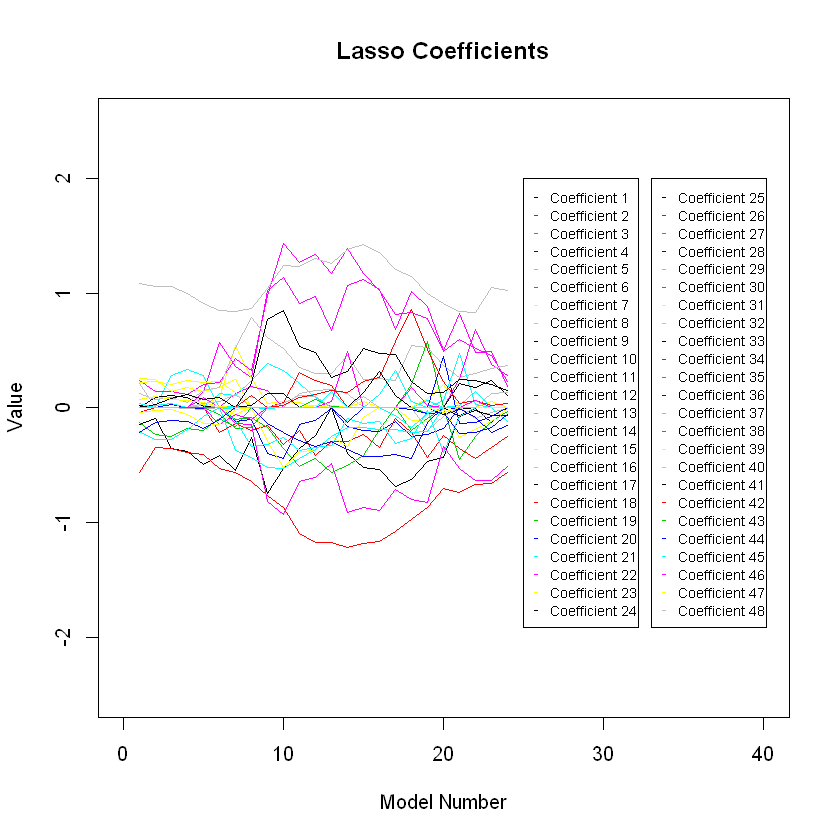

In [137]:
#Coefficients are shown in plot below.
#Each line represents a row in the coefficient matrix which is constructed above.
#In other words, each line includes coefficients of the same feature/variable for each model.
#(There are 24 models because we fit models for each hour saparately.)
#Therefore, we can observe change in coefficients model by model.

plot(coefficients_lasso[2,],type="l",col=1,xlim = c(0,40),ylim = c(-2.5,2.5),main="Lasso Coefficients", xlab="Model Number",
     ylab="Value")
for (i in 3:nrow(coefficients_lasso)) {
    points(coefficients_lasso[i,],type="l",col=(i-1))
}

names = c()
cum_names = c()
for (i in 1:24) {
    names = paste("Coefficient", i)
    cum_names = c(cum_names, names)
}
par(xpd=TRUE)
legend(25,2,cex = 0.7,
legend = cum_names, 
        col = c(1:23), pch = "-")
names = c()
cum_names = c()
for (i in 25:48) {
    names = paste("Coefficient", i)
    cum_names = c(cum_names, names)
}
par(xpd=TRUE)
legend(33,2,cex = 0.7,
legend = cum_names, 
        col = c(25:48), pch = "-")


# TASK E

#### I didn't make it.

# TASK F

In [195]:
#MAPE values are aggregated in a dataframe as following:
MAPE_values = cbind(A_Data$Per_Abs_Error_Lag48,A_Data$Per_Abs_Error_Lag168,B_test$Per_Abs_Error,C_test$Per_Abs_Error, 
                    D_MAPE_data)
colnames(MAPE_values) = c("Lag48","Lag168","Lin_Reg","Lin_Reg_Sep","Lasso_Reg")
rownames(MAPE_values) = c(1:240)
head(MAPE_values)

Lag48,Lag168,Lin_Reg,Lin_Reg_Sep,Lasso_Reg
7.69,0.50,1.63,3.21,1.98
7.02,0.39,1.21,3.00,1.74
7.25,0.37,1.58,3.50,1.58
6.98,0.15,1.23,3.25,1.62
6.32,0.17,0.75,2.69,2.07
6.55,0.54,1.38,3.13,1.44


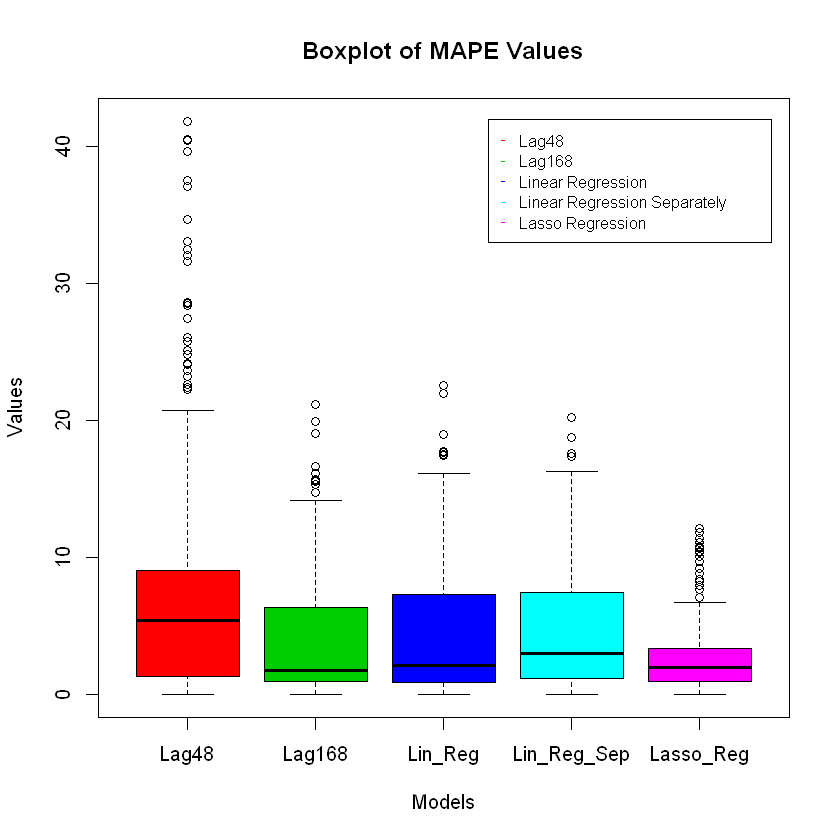

In [201]:
#Boxplot is drawn as following : 
boxplot(MAPE_values,col=c(2:6), ylab="Values", xlab="Models", main="Boxplot of MAPE Values")
par(xpd=TRUE)
legend(3.35,42,cex = 0.8,
legend = c("Lag48","Lag168","Linear Regression","Linear Regression Separately","Lasso Regression"), 
        col = c(2:6), pch = "-")


In [138]:
Summary

Model,MAPE,Std.Deviation
Lag48,7.81 %,9.04 %
Lag168,4.04 %,4.66 %
Linear_Regression,4.55 %,4.94 %
Linear_Regression_Separately,4.71 %,4.47 %
Lasso Regression,2.75 %,2.68 %


#### In conclusion, performance of Lasso Regression is the best in terms of both MAPE and standard deviation of error values. Lag168 model has a good performance compared to other models. Linear Regression and Linear Regression Separately models have similar results. Lag48 model is the worst model.